# Verifying Central Limit Theorem

The Central Limit Theorem states that the sampling distribution of the sampling means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30. All this is saying is that as you take more samples, especially large ones, your graph of the sample means will look more like a normal distribution.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Generate 1k random integers
Let us use NumPy to generate `1000` random integers between the range `0-100`. Our objective is to calculate the population mean and verify if the mean obtained using CLT comes close to population mean.

In [2]:
rand_1k = np.random.randint(0,100,1000)

In [3]:
rand_1k.size

1000

/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


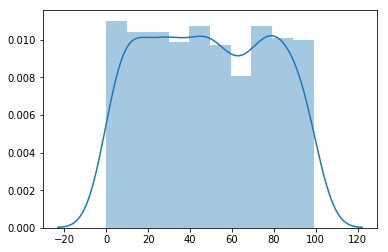

In [12]:
sns.distplot(rand_1k)

Thus the population follows a `uniform` distribution, **not** a `normal` distribution. Still, we will see the distribution of our means will follow a `normal` distribution.

### Calculate population mean

In [4]:
np.mean(rand_1k)

48.826

### Try out creating a subset and finding its mean

In [5]:
subset_100 = np.random.choice(rand_1k, size=100, replace=False)
subset_100.size

100

In [6]:
np.mean(subset_100)

43.2

The mean of this subset of `100` integers is `43.2`. Not close enough.

## Apply CLT.
We will generate `50` samples with `100` items each and find their means.

In [7]:
# generate 50 random samples of size 100 each
subset_means = []
for i in range(0,50):
    current_subset = np.random.choice(rand_1k, size=100, replace=False)
    subset_means.append(np.mean(current_subset))

Calculate the mean of means (its meta :))

In [33]:
clt_mean = np.mean(subset_means)
clt_mean

48.9768

Calculate the SD of the means

In [34]:
subset_sd = np.std(subset_means)
subset_sd

2.657234983963594

/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


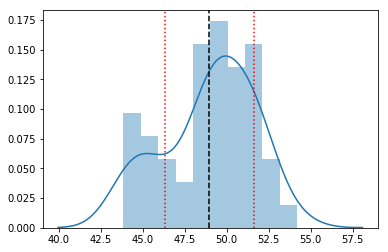

In [37]:
ax = sns.distplot(subset_means, bins=10)
# draw mean in black
ax.axvline(clt_mean, color='black', linestyle='dashed')

# draw mean +- 1 SD
ax.axvline(clt_mean + subset_sd, color='red', linestyle='dotted')
ax.axvline(clt_mean - subset_sd, color='red', linestyle='dotted')

Difference between mean of means and the population mean

In [38]:
np.mean(rand_1k) - clt_mean

-0.15079999999999671